
### Formulation du Problème :

Étant donné un ensemble de données $ \{(x^{(i)}, y^{(i)})\} $, où $ x^{(i)} $ est un vecteur d'entrée à 2 dimensions et $ y^{(i)} $ est la sortie cible correspondante, notre objectif est de trouver les paramètres optimaux $ w $ et $ b $ pour le modèle de réseau neuronal $ y = wx + b $ en minimisant une fonction de perte choisie $ L(y, y^{(i)}) $.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Générer des données aléatoires
np.random.seed(42)
num_samples = 1000
input_size = 2

# Générer des données d'entrée aléatoires
X = np.random.rand(num_samples, input_size)

# Générer des poids réels aléatoires et un biais pour le neurone
vrais_poids = np.random.rand(input_size)
vrai_biais = np.random.rand()

# Générer des étiquettes en utilisant les vrais poids et le biais avec un peu de bruit aléatoire
bruit = np.random.randn(num_samples) * 0.1  # Ajout de bruit aux étiquettes
y = np.dot(X, vrais_poids) + vrai_biais + bruit

In [8]:
#y=f(x)

In [9]:
X.shape

(1000, 2)

In [10]:
vrai_biais

0.9062545805210367

In [11]:
vrais_poids.shape

(2,)

In [12]:
print('W', vrais_poids)
print('b', vrai_biais)

W [0.26170568 0.2469788 ]
b 0.9062545805210367



### Équation de Propagation Avant (Feed Forward) :

L'équation de propagation avant pour le réseau neuronal est :

$$ y = wx + b $$

Où :
- $ y $ est la sortie prédite.
- $ x $ est le vecteur d'entrée de taille 2.
- $ w $ est le vecteur de poids de même taille que $ x $.
- $ b $ est le terme de biais.

In [13]:
# Initialiser les poids et le biais avec des valeurs aléatoires
poids = np.random.rand(input_size)
biais = np.random.rand()

print(np.dot(X, poids) + biais)

[0.90896427 1.03302905 0.37733944 0.62031895 0.9788087  0.63745063
 0.93819639 0.41013662 0.66108713 0.65678182 0.73071213 0.58002863
 0.89879342 0.57356659 0.67333561 0.74130584 0.66316078 1.31262112
 0.46864057 0.92369069 0.50351299 0.62103366 0.68727402 0.66488329
 0.69961893 1.30073774 1.33094061 1.07275124 0.34193507 0.36606189
 0.61356111 1.00043685 0.65073376 0.6570187  0.68782963 0.8843981
 0.55582622 1.07195757 0.82736348 0.51947971 1.14792957 0.47405075
 0.57635612 1.04869389 1.09883054 0.59999118 1.03894894 1.01655464
 0.7901624  0.25225368 0.4955285  0.66178821 1.014338   0.84925995
 0.39928984 0.48555555 1.28405197 1.07810317 0.90379339 1.13335657
 1.2269788  0.48482624 0.55661737 1.21939114 0.41944246 0.61408325
 0.43068635 1.07566969 0.91136349 0.90983572 1.05890312 0.71282794
 0.42555689 0.89280393 0.34994213 1.01050038 0.51902207 1.07288002
 1.05919105 0.70018589 0.75991985 0.9267098  0.6318789  0.52153299
 0.4823846  0.72725981 0.69100987 0.77282455 0.90489102 0.98698




### Formule de Descente de Gradient :

Pour optimiser les paramètres $ w $ et $ b $, nous utilisons la descente de gradient. La formule de mise à jour par descente de gradient pour les paramètres est :

$$ w := w - \alpha \cdot \frac{\partial L}{\partial w} $$
$$ b := b - \alpha \cdot \frac{\partial L}{\partial b} $$

Où :
- $ \alpha $ est le taux d'apprentissage.
- $ \frac{\partial L}{\partial w} $ et $ \frac{\partial L}{\partial b} $ sont les gradients de la fonction de perte $ L $ par rapport à $ w $ et $ b $ respectivement.

### Algorithme de Mise à Jour :

1. Initialiser les poids $ w $ et le biais $ b $ avec des valeurs aléatoires.
2. Parcourir l'ensemble de données $ \{(x^{(i)}, y^{(i)})\} $ en mini-lots ou dans son intégralité.
3. Pour chaque échantillon :
   - Calculer la sortie prédite $ y = wx + b $.
   - Calculer la perte $ L(y, y^{(i)}) $ entre la sortie prédite et la sortie réelle.
   - Calculer les gradients :
     $$ \frac{\partial L}{\partial w} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial w} $$
     $$ \frac{\partial L}{\partial b} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial b} $$
   - Mettre à jour les poids et le biais en utilisant la descente de gradient :
     $$ w := w - \alpha \cdot \frac{\partial L}{\partial w} $$
     $$ b := b - \alpha \cdot \frac{\partial L}{\partial b} $$
4. Répéter les itérations jusqu'à la convergence ou un nombre défini d'époques.

### Calcul des Gradients avec MSE :

Les gradients pour la fonction de perte MSE ($ L $) par rapport à $ w $ et $ b $ sont les suivants :

$$ \frac{\partial L}{\partial w} = \frac{1}{N} \sum_{i=1}^{N} 2(\hat{y} - y^{(i)}) \cdot x $$
$$ \frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} 2(\hat{y} - y^{(i)}) \cdot 1 $$

Où $ N $ est le nombre d'échantillons, $ \hat{y} $ est la sortie prédite, $ y^{(i)} $ est la sortie réelle, et $ x $ est le vecteur d'entrée. Ces gradients peuvent être utilisés dans la règle de mise à jour par descente de gradient pour entraîner le réseau neuronal.

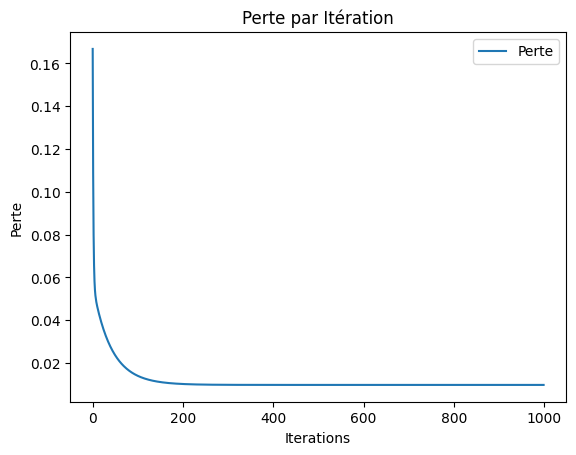

In [14]:
# Hyperparamètres
taux_apprentissage = 0.1
epochs = 1000

# Stocker les pertes à chaque itération
losses = []

# Boucle d'entraînement
for epoch in range(epochs):
    # Propagation avant
    sortie_predite = np.dot(X, poids) + biais # f(x)

    # Calcul de la perte (MSE)
    perte = np.mean((sortie_predite - y) ** 2) #L
    losses.append(perte)

    # Calcul des gradients loss.backward()
    dW = (2 / num_samples) * np.dot(X.T, (sortie_predite - y))
    db = (2 / num_samples) * np.sum(sortie_predite - y)

    # Mise à jour des poids et du biais en utilisant les gradients optimizer.step()
    poids -= taux_apprentissage * dW
    biais -= taux_apprentissage * db

# Création du graphique pour afficher la perte par itération
plt.plot(range(epochs), losses, label='Perte')
plt.xlabel('Iterations')
plt.ylabel('Perte')
plt.title('Perte par Itération')
plt.legend()
plt.show()

In [15]:
print(poids),print( biais)

[0.24644002 0.26237093]
0.9030910836118956


(None, None)

In [16]:
print('W', vrais_poids)
print('b', vrai_biais)

W [0.26170568 0.2469788 ]
b 0.9062545805210367
